In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("Imputed_data_Ivan.csv")
df

,LLHold,LLLatency,LRHold,LRLatency,RLHold,RLLatency,RRHold,RRLatency,LLHoldStd,LLLatencyStd,...,RHoldSkew,RLatencySkew,LHoldKurt,LLatencyKurt,RHoldKurt,RLatencyKurt,LRHold_Diff,LLRRLatency_Diff,LRRLLatency_Diff,Parkinsons
0,97.654140,406.716242,107.138017,411.718182,100.917949,430.258974,96.400784,365.736471,25.840600,162.606085,...,7.402816,0.446804,0.805770,-0.699806,106.075763,-0.725689,-2.581164,40.979771,-18.540793,0
1,64.452941,390.058823,66.233333,600.433333,68.500000,536.407143,64.341176,394.647059,10.799197,199.162594,...,0.239309,-0.208674,-0.233988,-0.775209,-0.109231,-1.327965,1.156507,-4.588235,64.026190,0
2,143.399528,347.882547,105.325886,313.541489,163.700000,310.799454,106.208750,322.170833,51.115372,101.977747,...,2.804074,-0.115531,0.797792,0.285031,23.790534,-0.215556,47.072756,25.711714,2.742036,0
3,144.314980,528.670445,180.632743,575.478761,156.391710,501.274093,159.277778,493.779630,42.482348,137.542548,...,0.264594,-0.364617,0.595533,-0.409263,0.520341,-0.042387,-18.904747,34.890816,74.204668,0
4,124.285207,300.323155,127.421731,335.508287,125.795492,321.131506,124.941855,332.621036,21.626193,81.749015,...,0.353481,-0.024474,5.019808,-0.741563,5.034476,-0.901017,-1.202048,-32.297880,14.376781,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,74.382119,233.183499,71.242987,249.604979,76.069314,282.845343,75.168615,262.600722,15.847420,68.129255,...,8.103708,0.929794,11.708047,0.692850,103.310649,1.547799,1.842681,-29.417223,-33.240364,0
82,104.445555,284.901879,114.021725,215.023762,102.083155,255.127555,114.708130,271.448199,43.152219,144.554373,...,0.065245,1.584906,196.537883,1.271138,2.400487,3.098033,-10.969995,13.453680,-40.103793,0
83,103.366013,249.626144,141.265306,262.962245,104.287387,247.860360,147.900000,350.363077,24.085334,75.679672,...,-0.368180,-0.033922,5.034818,0.918322,2.103608,-1.017572,-40.157634,-100.736933,15.101885,1
84,147.086450,505.747519,147.248437,456.021354,146.607565,580.315603,136.493676,545.699209,32.984655,139.372280,...,2.553821,0.323904,1.404602,-0.693057,19.824505,-0.903855,3.895622,-39.951690,-124.294249,0


In [4]:
X = df.iloc[:,0:50]
y = df.iloc[:,51]  # Target is the Parkinsons column

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
## Now split the data
## Have 20% for testing
## Set 614 as the random state
## and stratify the split

## I'll wait before writing the code myself :)
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=.25,
                                                shuffle=True,
                                                random_state=614,
                                                stratify=y)

In [14]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=10000)

In [15]:
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [16]:
y_train_pred = log_reg.predict(X_train)

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
confusion_matrix(y_train, y_train_pred)

array([[38,  2],
       [ 1, 23]], dtype=int64)

In [19]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(precision_score(y_train, y_train_pred))
print(recall_score(y_train, y_train_pred))

0.92
0.9583333333333334


In [20]:
probs = log_reg.predict_proba(X_train)


In [21]:
from sklearn.metrics import roc_curve

In [22]:
roc_curve(y_train,probs[:,1])

(array([0.   , 0.   , 0.   , 0.025, 0.025, 0.05 , 0.05 , 1.   ]),
 array([0.        , 0.04166667, 0.58333333, 0.58333333, 0.875     ,
        0.875     , 1.        , 1.        ]),
 array([1.99999983, 0.99999983, 0.83587731, 0.81808327, 0.59752866,
        0.57984051, 0.35455543, 0.        ]))

In [23]:
fpr,tpr,cutoffs = roc_curve(y_train,probs[:,1])

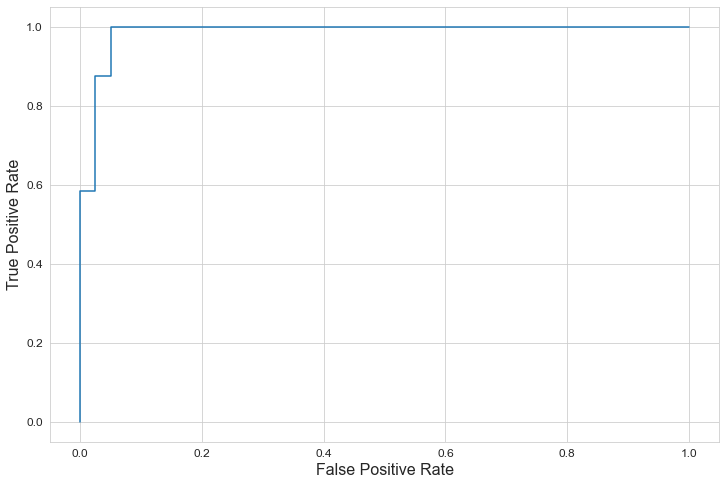

In [24]:
## Code here

## Sample Solution
plt.figure(figsize=(12,8))

plt.plot(fpr,tpr)

plt.xlabel("False Positive Rate",fontsize=16)
plt.ylabel("True Positive Rate",fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [25]:
from sklearn.metrics import roc_auc_score

In [26]:
roc_auc_score(y_train,probs[:,1])

0.9864583333333333